# Dataset

Predict Bitcoin price for next 30 days

In [597]:
#import libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression
import numpy as dragon
from sklearn.metrics import mean_squared_error
from binance.client import Client
import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import random
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing


from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

using BINANCE Exchange API for getting the dataset

In [598]:
api_key='kikMm5wCFBWPs8i6apOEPBopkfCMDFqhWaonzOrFjtUyZoVb0Zimj2KN5k3JN4L3'
api_secret='7oRcw5SiuSYSVUXWELkKZomLQ6UQFfAsuYWxOVbmnKTulxUxZMCUCtmQ0RwlWW42'
client = Client(api_key, api_secret)

Fetching dataset for top three cryptocurrency: Bitcoin,Ripple and Ethereum

In [599]:
# #Bitcoin
# symbol='BTCUSDT'
# BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
# #Ripple
# symbol='XRPUSDT'
# RIP=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
# #Ethereum
# symbol='ETHUSDT'
# ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")

In [600]:
 #Bitcoin
symbol='BTCUSDT'
BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ripple
symbol='XRPUSDT'
RIP=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ethereum
symbol='ETHUSDT'
ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")

adding columns to the dataset

In [601]:
BTC=pd.DataFrame(BTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
RIP=pd.DataFrame(RIP,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
ETH=pd.DataFrame(ETH,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])

Datatypes information

In [602]:
print("BTC Datatypes:")
print(BTC.dtypes)

BTC Datatypes:
Open time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close time                       int64
Quote asset volume              object
Number of trades                 int64
Taker buy base asset volume     object
Taker buy quote asset volume    object
Can be ignored                  object
dtype: object


Open time and close time was converted to date-time format from String 

In [603]:
BTC['Open time']=pd.to_datetime(BTC['Open time'],unit='ms')
BTC['Close time']=pd.to_datetime(BTC['Close time'],unit='ms')
RIP['Open time']=pd.to_datetime(RIP['Open time'],unit='ms')
RIP['Close time']=pd.to_datetime(RIP['Close time'],unit='ms')
ETH['Open time']=pd.to_datetime(ETH['Open time'],unit='ms')
ETH['Close time']=pd.to_datetime(ETH['Close time'],unit='ms')

Close price and volume traded are converted to float

In [604]:
BTC['Close']=BTC['Close'].astype(float)
BTC['Volume']=BTC['Volume'].astype(float)
BTC['Open']=BTC['Open'].astype(float)
BTC['High']=BTC['High'].astype(float)
BTC['Low']=BTC['Low'].astype(float)
RIP['Close']=RIP['Close'].astype(float)
RIP['Volume']=RIP['Volume'].astype(float)
RIP['Open']=RIP['Open'].astype(float)
RIP['High']=RIP['High'].astype(float)
RIP['Low']=RIP['Low'].astype(float)
ETH['Close']=ETH['Close'].astype(float)
ETH['Volume']=ETH['Volume'].astype(float)
ETH['Open']=ETH['Open'].astype(float)
ETH['High']=ETH['High'].astype(float)
ETH['Low']=ETH['Low'].astype(float)

Shape of the dataset

In [605]:
print("Shape of the dataset:",BTC.shape)
print("Shape of the dataset:",RIP.shape)
print("Shape of the dataset:",ETH.shape)

Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)


Statistics of each cyptocurrency

In [606]:
print("BTC statistics:")
print(BTC.describe())
print("RIP statistics:")
print(RIP.describe())
print("ETH statistics:")
print(ETH.describe())

BTC statistics:
              Open         High          Low        Close       Volume  \
count  2880.000000  2880.000000  2880.000000  2880.000000  2880.000000   
mean   9148.367399  9154.587660  9142.042090  9148.638889    75.462094   
std     284.049473   285.516463   282.404378   284.182218   103.274912   
min    8741.250000  8771.440000  8730.060000  8743.780000     4.515822   
25%    8906.000000  8910.140000  8901.695000  8906.032500    26.456049   
50%    9081.935000  9086.360000  9077.945000  9081.940000    46.298507   
75%    9328.025000  9332.665000  9323.842500  9327.967500    85.004919   
max    9931.780000  9939.000000  9892.330000  9930.020000  2114.112345   

       Number of trades  
count       2880.000000  
mean         686.580208  
std          713.909419  
min           84.000000  
25%          335.000000  
50%          500.500000  
75%          777.000000  
max        14958.000000  
RIP statistics:
              Open         High          Low        Close        Vo

Checking for missing values

In [607]:
print("BTC Missing Details:")
print(BTC.isnull().any())
print("RIP Missing Details:")
print(RIP.isnull().any())
print("ETH Missing Details:")
print(ETH.isnull().any())

BTC Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
RIP Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
ETH Missing Details:
O

Visualizations

Text(0, 0.5, 'Close Price')

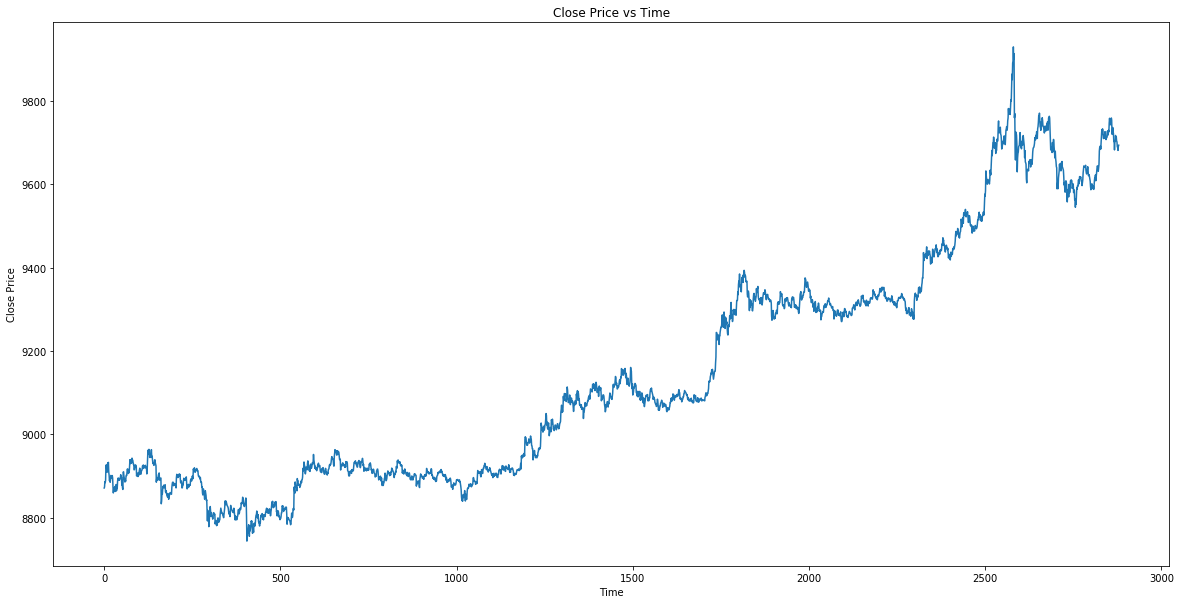

In [608]:
BTC['Close'].plot(figsize=(20,10),title='Close Price vs Time')
plt.xlabel('Time') 
plt.ylabel('Close Price') 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


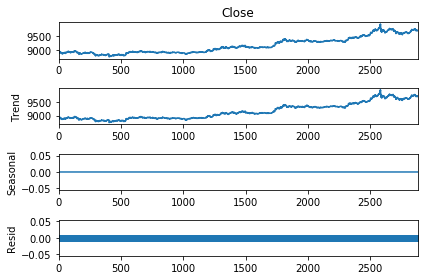

In [609]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series=BTC['Close']
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


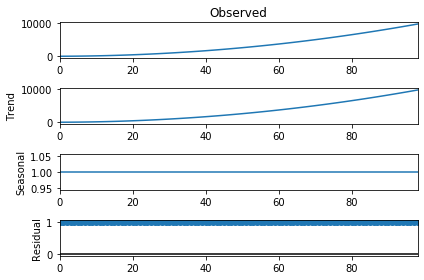

In [610]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()

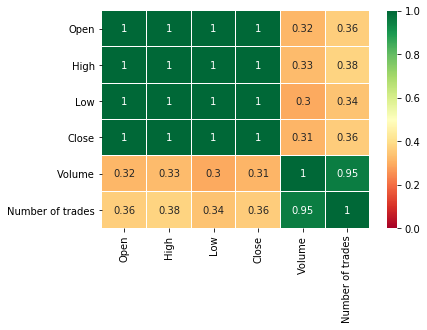

In [611]:
sns.heatmap(BTC.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

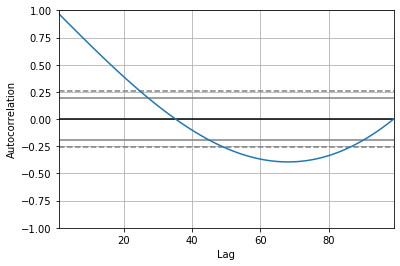

In [612]:
autocorrelation_plot(series)

preprocessing

In [613]:
# combined_df = pd.DataFrame()
# currencies = ["BTC","RIP","ETH"] 
# datasets = [BTC,RIP,ETH]
# # currencies = ["BTC"] 
# # datasets = [BTC]
# for i in range(len(currencies)):
#     currency=currencies[i]
#     df=datasets[i]
#     df.rename(columns={"Close": f"{currency}_Close", "Volume": f"{currency}_Volume"}, inplace=True)
#     df.set_index("Open time", inplace=True)
#     df = df[[f"{currency}_Close", f"{currency}_Volume"]]
#     if len(combined_df)==0:
#         combined_df=df
#     else:  # otherwise, join this data to the main one
#         combined_df=combined_df.join(df)
# combined_df.fillna(method="ffill", inplace=True) # missing values filled with the previously known values

In [614]:
combined_df = pd.DataFrame()
currencies = ["BTC","RIP","ETH"] 
datasets = [BTC,RIP,ETH]
# currencies = ["BTC"] 
# datasets = [BTC]
for i in range(len(currencies)):
    currency=currencies[i]
    df=datasets[i]
    df.rename(columns={"Close": f"{currency}_Close"}, inplace=True)
    df.set_index("Open time", inplace=True)
    df = df[[f"{currency}_Close"]]
    if len(combined_df)==0:
        combined_df=df
    else:  # otherwise, join this data to the main one
        combined_df=combined_df.join(df)
combined_df.fillna(method="ffill", inplace=True) # missing values filled with the previously known values

In [615]:
future_timeline=1 # to what we want to predict short term or long term 
currency="BTC" # which cryptocurrency we are predicting
combined_df['Future_Value']=combined_df[f'{currency}_Close'].shift(-future_timeline)

In [616]:
print("Combined_DF")
combined_df.head(10)

Combined_DF


BTC_Close  RIP_Close  ETH_Close  Future_Value
Open time                                                         
2020-05-12 15:06:00    8871.23    0.19878     190.83       8873.54
2020-05-12 15:07:00    8873.54    0.19873     190.94       8886.21
2020-05-12 15:08:00    8886.21    0.19877     191.06       8884.16
2020-05-12 15:09:00    8884.16    0.19880     191.20       8889.54
2020-05-12 15:10:00    8889.54    0.19880     191.08       8923.54
2020-05-12 15:11:00    8923.54    0.19927     191.51       8926.83
2020-05-12 15:12:00    8926.83    0.19921     191.33       8918.16
2020-05-12 15:13:00    8918.16    0.19910     191.13       8908.92
2020-05-12 15:14:00    8908.92    0.19887     191.02       8922.04
2020-05-12 15:15:00    8922.04    0.19895     191.33       8931.11

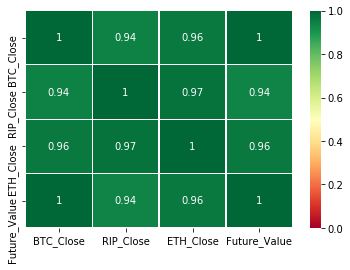

In [617]:
sns.heatmap(combined_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

standaridzation and normalization

In [618]:
def preprocess(df):

    for col in df.columns:  # go through all of the columns
        if col != "Future_Value":  # normalize all ... except for the target itself!
            df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
            df = df.replace([np.inf, -np.inf], np.nan)
            df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
            df[col] = preprocessing.scale(df[col].values)  

    df.dropna(inplace=True)  # cleanup again... jic.
    return df

combined_df=preprocess(combined_df)

In [619]:
print("Combined_DF")
combined_df.head()

Combined_DF


BTC_Close  RIP_Close  ETH_Close  Future_Value
Open time                                                         
2020-05-12 15:09:00  -0.246879   0.164143   0.730900       8889.54
2020-05-12 15:10:00   0.541145  -0.009239  -0.663749       8923.54
2020-05-12 15:11:00   3.574585   2.706670   2.286754       8926.83
2020-05-12 15:12:00   0.317926  -0.355133  -0.983902       8918.16
2020-05-12 15:13:00  -0.944693  -0.643569  -1.091974       8908.92

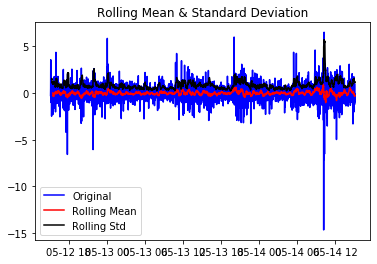

ADF Stastistic: -29.507961
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [620]:
def test_stationarity(x):
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = combined_df['BTC_Close']      
test_stationarity(ts)

spliting into train and validation

In [621]:
times=sorted(combined_df.index.values)
last_5pct=sorted(combined_df.index.values)[-int(0.05*len(times))]
validation_df = combined_df[(combined_df.index >= last_5pct)]  # make the validation data where the index is in the last 5%
train_df = combined_df[(combined_df.index < last_5pct)]  

In [622]:
print("Length validation dataset:",len(validation_df))
print("Length train dataset:",len(train_df))

Length validation dataset: 143
Length train dataset: 2733


Getting features for predcitions

In [623]:
feature_length=10  # how long of a preceeding sequence to take as features

In [624]:
def features(df):
    sequential_data=[]
    index=[]
    count=0
    prev_days = deque(maxlen=feature_length)
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days)==feature_length:
            sequential_data.append([np.array(prev_days), i[-1]]) 
            index.append(df.index.values[count])
        count=count+1
            

   # random.shuffle(sequential_data)
    X = []
    y = []
    #print(sequential_data)
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X), y,index

train_x, train_y,index_train=features(train_df) 
validation_x, validation_y,index_validation=features(validation_df)

In [633]:
print((validation_x.shape))

(134, 30)


In [632]:
print((train_x.shape))

(2724, 30)


In [628]:
train_x_NN=train_x
validation_x_NN=validation_x
train_y_NN= np.array(train_y) 
validation_y_NN= np.array(validation_y) 

In [631]:
train_x=train_x.reshape(len(train_x),30)
validation_x=validation_x.reshape(len(validation_x),30)

Model

In [634]:
np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_x, train_y)
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))
y_pred, sigma = gp.predict(validation_x, return_std=True)
print("Value at Test points",y_pred)
print("Original Value at Test points:",validation_y)
print("Confidenne at Test point predictions ",1.9600 * sigma)
rms = sqrt(mean_squared_error(validation_y, y_pred))
print("RMSE is:",rms)

GPML kernel: 31.6**2 * RBF(length_scale=3.89)
Log-marginal-likelihood: -9661364.215
Value at Test points [8562.91502664 8341.21837656 8081.50080612 8728.69136022 8231.84322599
 8179.58616659 7985.85813446 8997.57465131 9105.47177305 9205.30011245
 8950.34107791 8372.20977203 8241.04776438 8101.90622058 6826.69529639
 6716.61193299 7208.54099756 7095.45432366 7132.98863742 8490.31927443
 9086.22012126 8724.41004951 8962.82293379 9081.7018281  8592.276042
 8736.55635596 9081.86611443 8896.40252868 8863.12089987 9168.57596245
 8683.91006395 9155.35175643 9120.1913502  9190.81608705 8827.84081441
 8745.6012596  8897.11660728 8430.85758326 8397.83588252 8572.53838093
 8715.11105745 8816.50312367 8951.67387173 9167.32116298 9173.18945944
 9196.09695357 9224.62472706 9373.80320045 9475.09829195 9309.37371255
 9185.1734608  9145.11212407 9061.29125485 8821.50409147 8818.74206924
 8594.89207862 9009.13832048 9148.34012392 9281.57632687 9324.4531361
 9227.64919126 9114.94334786 9244.62781841 906

In [535]:
def plot(X,plot1,plot2):#the plotting fucntion in general
    Xi = list(range(len(X)))
    plt.xticks(Xi, X)
    plt.plot(Xi,plot1,marker='o',markersize=5,label = "Actual") 
    plt.plot(Xi,plot2,marker='o',markersize=5,label = "Predicted") 
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title("Time vs Close price") 
    plt.legend()
    plt.show()

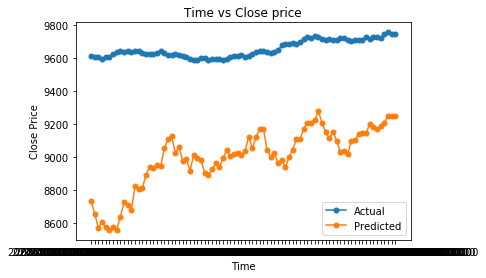

In [536]:
predicted_df=pd.DataFrame(index=index_validation)
predicted_df['Predicted_Future_Value']=y_pred
actual_df=pd.DataFrame(index=index_validation)
actual_df['Future_Value']=validation_y
plot(predicted_df.index.values,actual_df['Future_Value'],predicted_df['Predicted_Future_Value'])

In [537]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(train_x)
principal_train = pd.DataFrame(data = principalComponents,columns = ['principal component 1'])
principalComponents = pca.fit_transform(validation_x)
principal_validation = pd.DataFrame(data = principalComponents,columns = ['principal component 1'])

In [538]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

Text(0, 0.5, '$f(x)$')

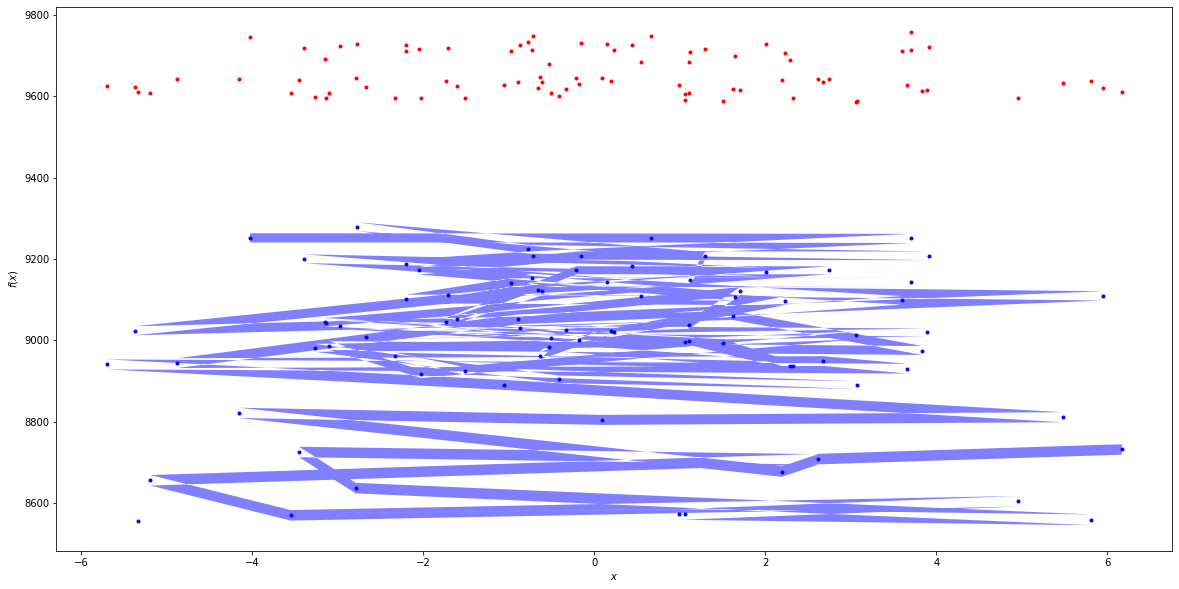

In [540]:
plt.figure(figsize=(20,10))
#plt.plot(principal_train['principal component 1'], train_y,"g.", label='Observations')
plt.plot(principal_validation['principal component 1'], validation_y, 'r.', label='Prediction')
plt.plot(principal_validation['principal component 1'], y_pred, 'b.', label='Prediction')
plt.fill(np.concatenate([principal_validation['principal component 1'], principal_validation['principal component 1'][::-1]]),
         np.concatenate([y_pred- 1.960 * sigma,
                        (y_pred + 1.960 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim(-10, 20)
#plt.legend(loc='upper left')


LSTM

In [474]:
train_x_NN.shape

(2671, 60, 6)

In [477]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(train_x_NN.shape[1:]), return_sequences=True))
# model.add(Dropout(0.2))
# #model.add(BatchNormalization())

# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.1))
# #model.add(BatchNormalization())

# model.add(LSTM(128))
# model.add(Dropout(0.2))
# #model.add(BatchNormalization())

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(1, activation='softmax'))

# model.compile(optimizer="adam",loss="mean_squared_error")
# model.fit(train_x_NN,train_y_NN,epochs=5,batch_size=64)

# predicted_data=model.predict(validation_x_NN)
# print(np.sqrt(mean_squared_error(validation_y_NN, predicted_data)))

Epoch 1/5
42/42 [==============================] - 13s 298ms/step - loss: 80234488.0000
Epoch 2/5
42/42 [==============================] - 10s 248ms/step - loss: 80234472.0000
Epoch 3/5
42/42 [==============================] - 11s 251ms/step - loss: 80234456.0000
Epoch 4/5
42/42 [==============================] - 10s 246ms/step - loss: 80234456.0000
Epoch 5/5
42/42 [==============================] - 11s 263ms/step - loss: 80234480.0000
9328.369608346116


In [507]:
from keras.layers import LSTM

model=Sequential()
model.add(LSTM(10,input_shape=(train_x_NN.shape[1:]),activation="relu"))
model.add(Dense(2))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(x_train,y_train,epochs=10,batch_size=32)

TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.recurrent.LSTM object at 0x14a66cd10>

RNN

In [473]:
len(train_x_NN)

2671

In [439]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(train_x_NN.shape[1:])))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#third RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(train_x_NN,train_y_NN,epochs=5,batch_size=64)

predicted_data=regressor.predict(validation_x_NN)
print(np.sqrt(mean_squared_error(validation_y_NN, predicted_data)))


Epoch 1/5
2671/2671 [==============================] - 34s 13ms/step - loss: 1001498893.4631
Epoch 2/5
2671/2671 [==============================] - 31s 12ms/step - loss: 13265917.1258
Epoch 3/5
2671/2671 [==============================] - 27s 10ms/step - loss: 10448532.3639
Epoch 4/5
2671/2671 [==============================] - 27s 10ms/step - loss: 8066278.8982
Epoch 5/5
2671/2671 [==============================] - 30s 11ms/step - loss: 2717292.1418
801.7582916464512


In [527]:
num_trees = 200
scoring    = "neg_root_mean_squared_error"
seed=9

In [528]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_depth=50,random_state=0,min_samples_split=2)))
#models.append(('GB',GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)))
#models.append(('NB', GaussianNB()))
#svm=SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005,random_state=seed)
models.append(('SVM', SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005,random_state=seed) ))
#models.append(('SVM', BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42) ))
#models.append((BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=42))
#models.append(('SVM', SVC(random_state=seed)))

In [530]:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-t

LR: nan (nan)


KeyboardInterrupt: 

In [533]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)
predicted_data=reg.predict(validation_x)
print(np.sqrt(mean_squared_error(validation_y, predicted_data)))

375.85526137039864


linear regression train score: 170.48397348822752
linear regression test score: 375.85526137039864
ridge regression train score low alpha: 170.483973493717
ridge regression test score low alpha: 375.85445170352597
ridge regression train score high alpha: 170.79945374852235
ridge regression test score high alpha: 370.16897648747494


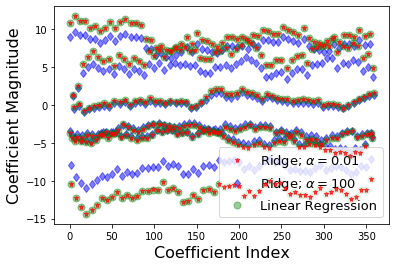

In [548]:
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(train_x, train_y)
rr = Ridge(alpha=0.01) 
rr.fit(train_x, train_y)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(train_x, train_y)

train_score_pred=lr.predict(train_x)
train_score=np.sqrt(mean_squared_error(train_y, train_score_pred))
test_score_pred=lr.predict(validation_x)
test_score=np.sqrt(mean_squared_error(validation_y, test_score_pred))

Ridge_train_score_pred=rr.predict(train_x)
Ridge_train_score=np.sqrt(mean_squared_error(train_y, Ridge_train_score_pred))
Ridge_test_score_pred=rr.predict(validation_x)
Ridge_test_score=np.sqrt(mean_squared_error(validation_y, Ridge_test_score_pred))

Ridge_train_score100_pred=rr100.predict(train_x)
Ridge_train_score100=np.sqrt(mean_squared_error(train_y, Ridge_train_score100_pred))
Ridge_test_score100_pred=rr100.predict(validation_x)
Ridge_test_score100=np.sqrt(mean_squared_error(validation_y, Ridge_test_score100_pred))



print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()